# MLflow Model Registry


The MLflow Model Registry component is a centralized model store, set of APIs, and UI, to collaboratively manage the full lifecycle of an MLflow Model. It provides model lineage (which MLflow experiment and run produced the model), model versioning, model aliasing, model tagging, and annotations.


## Concepts

* Model
* Registered Model
* Model Version
* Model Alias
* Tags
* Annotations and descriptions

##  Register a Model via UI

In [ ]:
import mlflow
from mlflow_for_ml_dev.src.utils.folder_operations import get_project_root

# set mlflow tracking uri
mlflow.set_tracking_uri(uri=(get_project_root() / 'mlruns').as_uri())

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
client = mlflow.MlflowClient()

In [ ]:
# instantiate a model
rfc = RandomForestClassifier()

# log the model
with mlflow.start_run(run_name="logging_model") as run:
    mlflow.sklearn.log_model(sk_model=rfc,artifact_path= rfc.__class__.__name__)

# Registering a model using the Python SDK

### Providing `registered_model_name` parameter

In [ ]:
# instantiate a model
rfc = RandomForestClassifier(n_estimators=1)

with mlflow.start_run(run_name="registering_model_providing_name") as run:
    # log the model
    mlflow.sklearn.log_model(sk_model = rfc, artifact_path= rfc.__class__.__name__, registered_model_name="registered-model-sdk")

In [ ]:
run.info.artifact_uri

## Creating a registered model via SDK

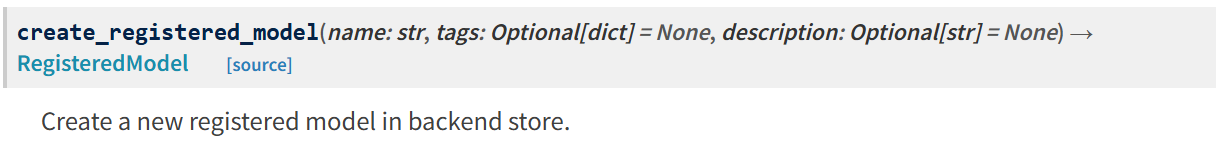

In [ ]:
model_name = "registered-model-via-client"

try:
    result = client.create_registered_model(name = model_name)
except Exception as e:
    # The method above fails if the model already exists
    print(e)

print(f"Model {result.name} created")
print(f"Model description: {result.description}")
print(f"Model creation timestamp: {result.creation_timestamp}")
print(f"Model Tags: {result.tags}")
print(f"Model Aliases: {result.aliases}")


## Creating a model version
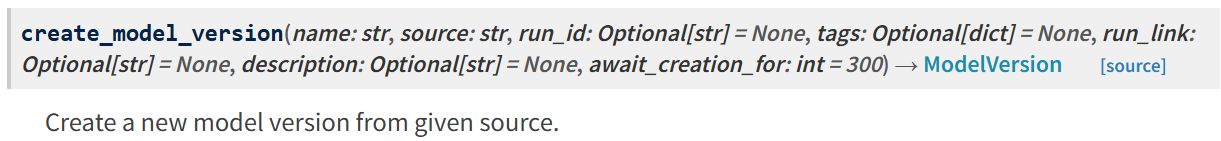

In [ ]:
try:
    model_version = client.create_model_version(
        name = model_name,
        source = run.info.artifact_uri,
        run_id = run.info.run_id,
        description = "Model Version created using MLflow Client")
except Exception as e:
    # The method above fails if the registered model does not exist.
    print(e)

print(f"Model version {model_version.version} created")
print(f"Model version status: {model_version.status}")
print(f"Model version description: {model_version.description}")
print(f"Model version creation timestamp: {model_version.creation_timestamp}")
print(f"Model version source: {model_version.source}")
print(f"Model version run_id: {model_version.run_id}")
print(f"Model version status_message: {model_version.status_message}")
